In [35]:
import numpy as np # Importing the numpy library for numerical operations and aliasing it as np
import matplotlib.pyplot as plt # Importing the matplotlib.pyplot library for plotting and aliasing it as plt
import pandas as pd # Importing the pandas library for data manipulation and analysis and aliasing it as pd

In [36]:
import kagglehub # Importing the kagglehub library to interact with Kaggle models and datasets

# Download latest version of the dataset from Kaggle
path = kagglehub.dataset_download("akram24/social-network-ads") # Downloading the dataset from Kaggle and storing the local path in the 'path' variable

print("Path to dataset files:", path) # Printing the local path where the dataset files are downloaded

Using Colab cache for faster access to the 'social-network-ads' dataset.
Path to dataset files: /kaggle/input/social-network-ads


In [37]:
dataset = pd.read_csv('/root/.cache/kagglehub/datasets/akram24/social-network-ads/versions/1/Social_Network_Ads.csv') # Reading the CSV file into a pandas DataFrame
X = dataset.iloc[:, [2, 3]].values # Selecting columns with index 2 and 3 (Age and EstimatedSalary) as the features (X)
y = dataset.iloc[:, 4].values # Selecting the column with index 4 (Purchased) as the target variable (y)

In [38]:
X = dataset.iloc[:, [2, 3]].values # Selecting columns with index 2 and 3 (Age and EstimatedSalary) as the features (X) again, this line appears to be redundant as it is already done in the previous cell.
y = dataset.iloc[:, 4].values # Selecting the column with index 4 (Purchased) as the target variable (y) again, this line appears to be redundant as it is already done in the previous cell.

In [39]:
from sklearn.model_selection import train_test_split # Importing the train_test_split function from scikit-learn for splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0) # Splitting the data into training and testing sets (75% train, 25% test) with a fixed random state

In [40]:
from sklearn.preprocessing import StandardScaler # Importing the StandardScaler class from scikit-learn for feature scaling
sc = StandardScaler() # Creating an instance of StandardScaler
X_train = sc.fit_transform(X_train) # Fitting the scaler on the training features and transforming them
X_test = sc.transform(X_test) # Transforming the test features using the scaler fitted on the training data

In [41]:
from sklearn.tree import DecisionTreeClassifier # Importing the DecisionTreeClassifier class from scikit-learn
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0) # Creating a Decision Tree Classifier instance with entropy criterion and a fixed random state
classifier.fit(X_train, y_train) # Training the Decision Tree Classifier model on the scaled training data

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [30]:
y_pred = classifier.predict(X_test)

In [31]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

/tmp/ipython-input-3904178543.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


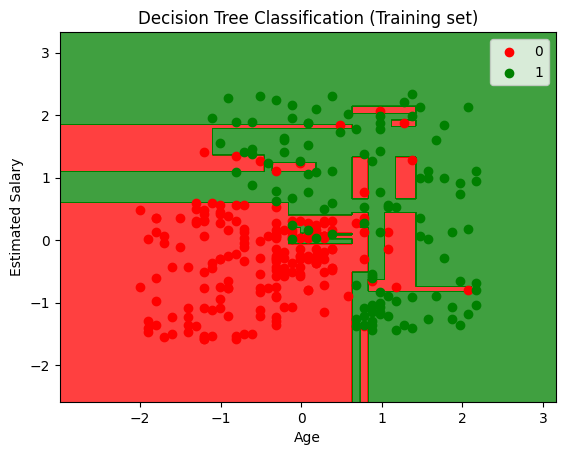

In [32]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Decision Tree Classification (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

/tmp/ipython-input-2236418229.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


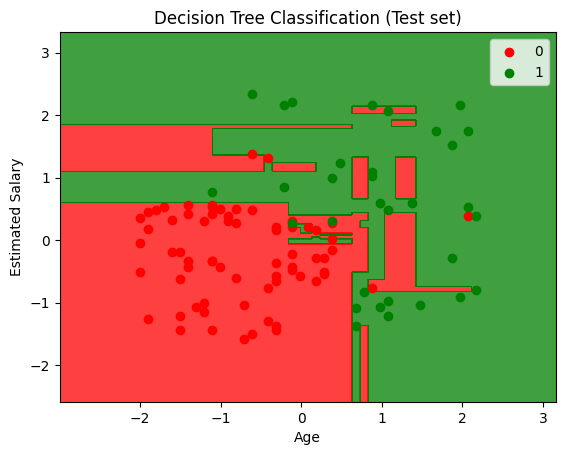

In [33]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Decision Tree Classification (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

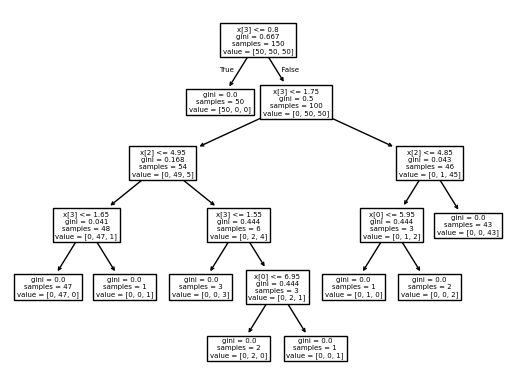

In [34]:
from sklearn.datasets import load_iris
from sklearn import tree
iris = load_iris()
x,y=iris.data, iris.target
clf = tree.DecisionTreeClassifier()
clf = clf.fit(x,y)
tree.plot_tree(clf)
plt.show()